In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from frbcat import Frbcat
from frbcat import TNS
tns = TNS()
df_tns = tns.df
df_frbcat = Frbcat().df

C:\Users\hmsm | Using Downloads\tns_2020-12-03.csv
C:\Users\hmsm | Using Downloads\frbcat_2020-12-03.csv


In [120]:
def stats():
    """ print stats about the FRB databases and dump them to csv """
    print('TNS # unique Stats:')
    # print(df_tns.keys())
    print(df_tns[['name', 'internal_name', 'host_redshift']].nunique())

    print('FRBcat # unique Stats:')
    # print(df_frbcat.keys())
    print(df_frbcat[['frb_name', 'redshift_host', 'ra']].nunique())
    df_frbcat.to_csv('frbcatdump.csv')
    df_tns.to_csv('tnsdump.csv')
stats()
pd.set_option('display.max_rows', 500)

# fuck pandas
namedfrbs = df_frbcat.dropna(subset=['internal_name'])[df_frbcat.dropna(subset=['internal_name'])['internal_name'].str.contains('FRB')]
namedfrbs['internal_name'][namedfrbs['internal_name'].duplicated()]
namedfrbs['internal_name']

TNS # unique Stats:
name             284
internal_name    247
host_redshift      8
dtype: int64
FRBcat # unique Stats:
frb_name         129
redshift_host      9
ra               133
dtype: int64


KeyError: ['internal_name']

## Manual Scrape

In [2]:


pd.set_option('display.max_rows', 500)
frbcat = pd.read_csv('frbcat_20200609.csv')
frbcat = frbcat.set_index('frb_name')

data_frbs = []
with open('frbcat_frbs_with_data.txt', 'r') as f:
    data_frbs = [s.rstrip() for s in f.readlines()]

In [4]:
frbcat['len'] = [len(x) for x in frbcat['rop_raj']]
frbcat = frbcat.sort_values(by='len', ascending=False)

frbcat_data = frbcat.loc[data_frbs]
# frbcat_data = frbcat_data.sort_values(by='rmp_snr', ascending=False)
frbcat_data

,utc,telescope,rop_raj,rop_decj,rop_gl,rop_gb,rmp_dm,rmp_width,rmp_snr,len
frb_name,,,,,,,,,,
FRB130729,2013/07/29 09:01:51.190,parkes,13:41:21,-05:59:43,324.78800,54.744600,861&plusmn2,15.61,14.0,8
FRB110703,2011/07/03 18:59:40.607,parkes,23:30:51,-02:52:24,80.99780,-59.019100,1103.6&plusmn0.7,4.30,16.0,8
FRB180417,2018/04/17 13:18:31.000,ASKAP,12:24:56,+14:13,276.00000,75.600000,474.8,2.52,24.2,8
FRB130628,2013/06/28 03:58:00.178,parkes,09:03:02,03:26:16,225.95500,30.655600,469.88&plusmn0.01,0.64,29.0,8
FRB121102,2012/11/02 06:35:53.244,arecibo,05:32:09,33:05:13,174.95000,-0.225138,557&plusmn2,3.00,14.0,8
FRB090625,2009/06/25 21:53:51.379,parkes,03:07:47,-29:55:36,226.44400,-60.030300,899.55&plusmn0.01,1.92,30.0,8
FRB150215,2015/02/15 20:41:41.714,parkes,18:17:27,-04:54:15,24.66280,5.280920,1105.6&plusmn0.8,2.88,19.0,8
FRB120127,2012/01/27 08:11:21.725,parkes,23:15:06,-18:25:38,49.28710,-66.203700,553.3&plusmn0.3,1.10,11.0,8
FRB110626,2011/06/26 21:33:17.477,parkes,21:03:43,-44:44:19,355.86200,-41.752200,723&plusmn0.3,1.40,11.0,8


In [56]:
len(frbcat_data)

54

In [57]:
intensity = np.load('CHIME_180814.J1554+74.npy')
intensity.shape

(16384, 16384)

In [58]:
# Downsample 
intensity_down = intensity[::8, ::8]
intensity_down.shape

(2048, 2048)

(2048, 2048)

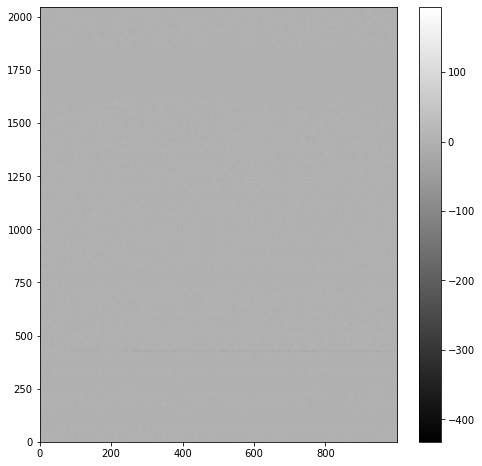

In [68]:
noise = intensity_down[:,0:100].mean(axis=1)[:, None]
burstwindow = intensity_down - 1*noise
burstwindow[1600:1850] = 0
burstwindow[75:150] = 0
burstwindow[750:800] = 0
burstwindow[250:300] = 0
burstwindow[350:400] = 0
cmap = plt.get_cmap('gray')
cmap.set_bad(color = 'k', alpha = 1.) # potentially hides important errors in the data!

plt.figure(figsize=(8,8))
# plt.imshow(intensity, cmap="gray", aspect='auto', origin='lower', interpolation='bicubic')
plt.imshow(burstwindow[:,0:1000], cmap=cmap, aspect='auto', origin='lower', interpolation='bicubic')#, norm=mcolors.LogNorm(vmin=1))
# plt.clim(0, 300)

# Noisy bands
# plt.axhline(y=13400); plt.axhline(y=14500)
# plt.axhline(y=13400)

plt.colorbar()
burstwindow.shape